## <center>UNIVERSIDADE ESTADUAL DE SANTA CRUZ - UESC<center> <center>DEPARTAMENTO DE ENGENHARIAS E COMPUTAÇÃO - DEC </center>
#### <center>CURSO DE ENGENHARIA QUÍMICA</center>


**CET1012** - Modelagem, Simulação e Otimização de Processos Químicos.

**Tema**: Aplicação de Métodos Computacionais para Simulação de uma Coluna de Destilação de Multiplos Estágios.

**Professor**: Prof. Dr E.R.Edwards

**Assunto**: Balanço material de uma bateria de colunas de destilação no estado estacionário.<br>
**Fonte**: Wu Hong Kwong, "**Resolvendo Problemas de Engenharia Química com Softwares Livre Scilab**", Editora: UFScar<br>
Cap.7, Exercício 7.1


**Exemplo 7.1**:  Balanço material de uma bateria de colunas de destilação no estado estacionário.

Uma coluna de destilação tem $70 \ mol/min$ de vazão de entrada contendo Xileno, Estireno, Tolueno e Benzeno. Esses componentes devem ser separados por meio de uma sequência de colunas de destilação como apresentado na figura abaixo, em que $F$, $D_1$, $B_1$, $D_2$, $B_2$, $D_3$ e $B_3$ são as vazões molares dadas em $mol/min$.


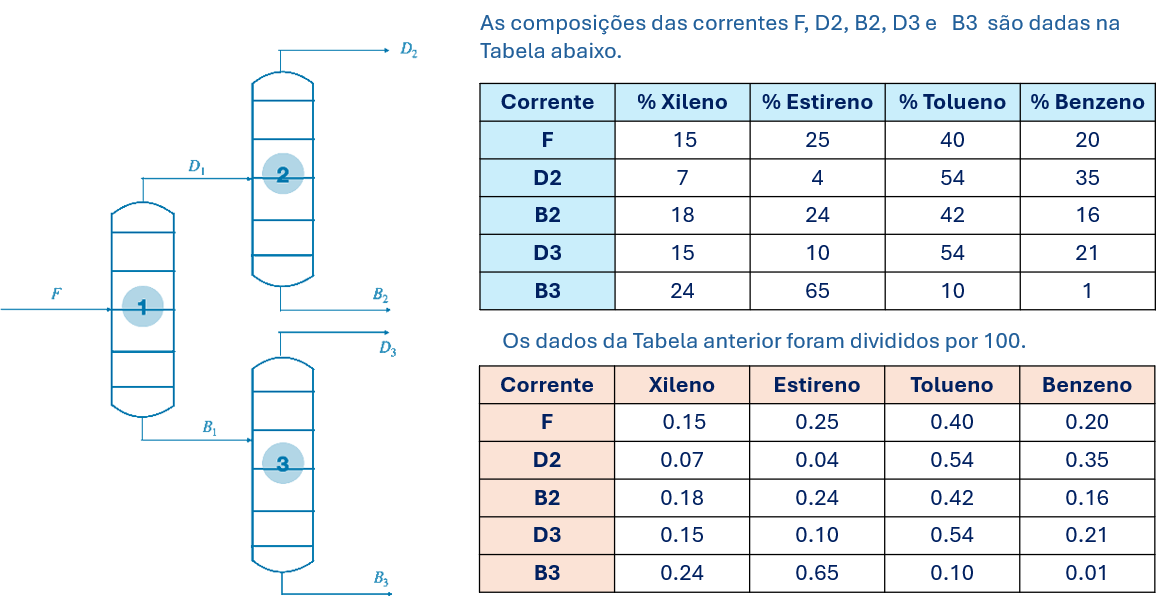

In [1]:
#pip install ipython -> Já deve estar instalado.
from IPython.display import Image, display

display(Image(filename='coluna_multiestagio.png', width=600))


Vamos fazer um esquema de notações para os vários componentes para facilitar o desenvolvimento de forma computacional.

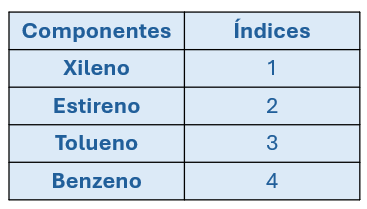

In [2]:
display(Image(filename='notacoes_componetes.png', width=200))

Balanço Global
Agora vamos fazer um balanço global para o volume de controle compreendido pela caixa tracejada conforme mostrado na figura abaixo

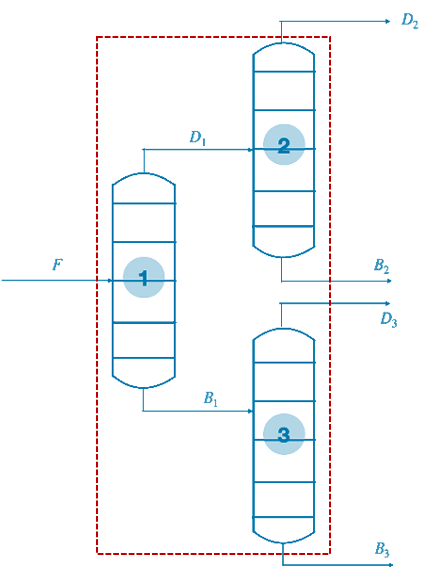

In [3]:
display(Image(filename='coluna_multiestagio_vc.png', width=250))

Fazendo um balanço de massa temos:

$$ Xileno: F_{z1} = D_2y_{21} + B_2x{21} + D_3y_{31} + B_3x_{31} $$
$$ Estireno: F_{z2} = D_2y_{22} + B_2x{22} + D_3y_{32} + B_3x_{32} $$
$$ Tolueno: F_{z3} = D_2y_{23} + B_2x{23} + D_3y_{33} + B_3x_{33} $$
$$ Benzano: F_{z4} = D_2y_{24} + B_2x{24} + D_3y_{34} + B_3x_{34} $$

\begin{equation}
    \begin{bmatrix}
        y_{21} & x_{21} & y_{31} & x_{31} \\
        y_{22} & x_{22} & y_{32} & x_{33} \\
        y_{22} & x_{23} & y_{33} & x_{33} \\
        y_{24} & x_{24} & y_{34} & x_{34} \\
    \end{bmatrix}
    .
    \begin{bmatrix}
    D_2 \\
    B_2 \\
    D_3 \\
    B_3
    \end{bmatrix}
    =
    \begin{bmatrix}
    F_{z1} \\
    F_{z2} \\
    F_{z3} \\
    F_{z4}
    \end{bmatrix}
\end{equation}

A solução desse **Sistema de Equações Lineares** fornece os valores de vazões $D_2$, $B_2$, $D_3$ e $B_3$.


Agora vamos escrever um conjunto de equações para calcular as vazões $D_1$ e $B_1$ e suas respectivas composições. 
<br>Para isso, vamos fazer um balanço de massa no **primeiro separador** conforme mostrado na figura abaixo.
<br>O volume de controle  mostra as vazões de entradas e saídas nesse separador.


#### Balanço de massa na Coluna 1.

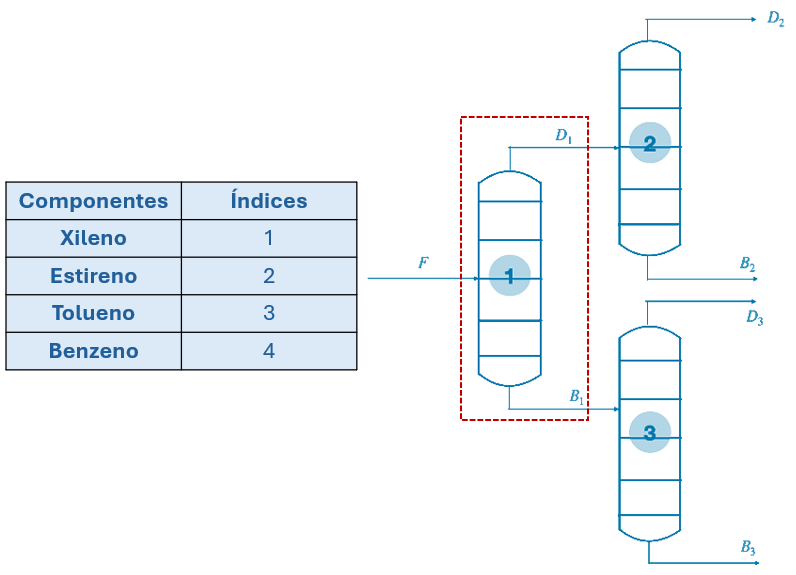

In [4]:
display(Image(filename='volume_controle_sep1.png', width=500))

Vamos fazer um balanço de massa no **segundo separador** conforme mostrado na figura abaixo.

$$ Xileno: \ \ Fz_1 = D_1y_{11} + B_1x_{11} $$
$$ Estireno:\ \  Fz_2 = D_1y_{12} + B_1x_{12}$$
$$ Tolueno: \ \ Fz_3 = D_1y_{13} + B_1x_{13}$$
$$ Benzeno: \ \ Fz_4  = D_1y_{14} + B_1x_{14}$$

**Lembre-se**: O primeiro número do índice corresponde a **coluna** e o segundo número do índice o **componente**.


#### Balanço de massa na Coluna 2.

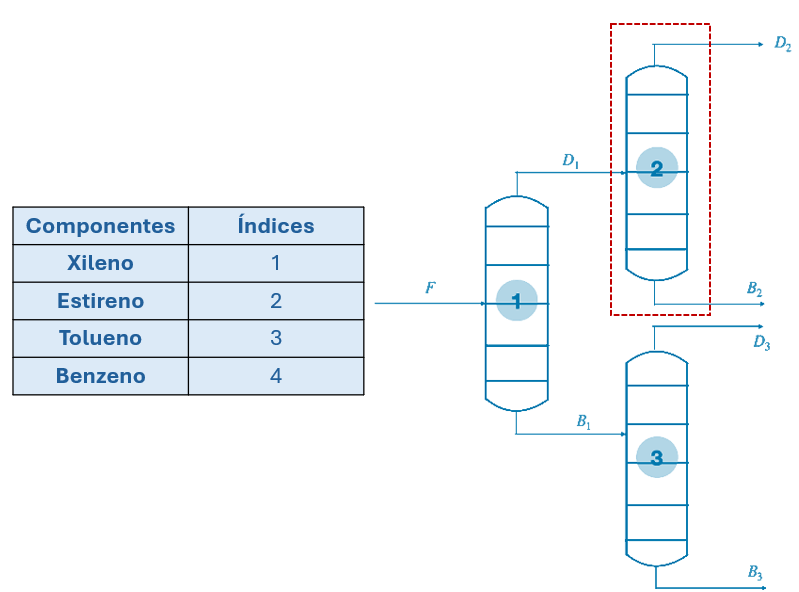

In [5]:
display(Image(filename='volume_controle_sep2.png', width=500))

Para o volume de controle no **segundo separador**, temos:

$$Massa \ \ total: \ \ D_1 = D_2 + B_2 $$

$$ Xileno: \ \ D_1y_{11} = D_2y_{21} + B_2x_{21} $$
$$ Estireno: \ \  D_1y_{12} = D_2y_{22} + B_2x_{22}$$
$$ Tolueno: \ \ D_1y_{13} = D_2y_{23} + B_2x_{23}$$
$$ Benzeno: \ \ D_1y_{14}  = D_2y_{24} + B_2x_{24}$$

**Lembre-se**: O primeiro número do índice corresponde a **coluna** e o segundo número do índice o **componente**.


#### Balanço de massa na Coluna 3.

Vamos fazer um balanço de massa no **terceiro separador** conforme mostrado na figura abaixo.


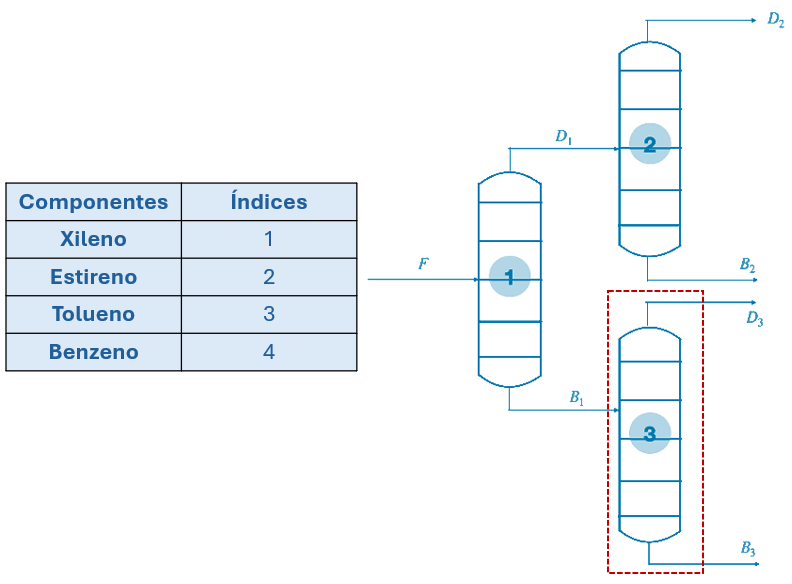

In [6]:
display(Image(filename='volume_controle_sep3.png', width=500))


$$Massa \ \ total: \ \ B_1 = D_3 + B_3 $$

$$ Xileno: \ \ B_1x_{11} = D_3y_{31} + B_3x_{31} $$
$$ Estireno: \ \  B_1x_{12} = D_3y_{32} + B_3x_{32}$$
$$ Tolueno: \ \ B_1x_{13} = D_3y_{33} + B_3x_{33}$$
$$ Benzeno: \ \ B_1x_{14}  = D_3y_{34} + B_3x_{34}$$


Agora, vamos criar uma matriz  $A.\vec{x}=\vec{b}$ com os dados obtidos no **balanco global**.

\begin{equation}
\begin{bmatrix}
        y_{21} & x_{21} & y_{31} & x_{31} \\
        y_{22} & x_{22} & y_{32} & x_{32} \\
        y_{23} & x_{23} & y_{33} & x_{33} \\
        y_{24} & x_{24} & y_{34} & x_{34} \\
    \end{bmatrix}
       .
    \begin{bmatrix}
    D_2 \\
    B_2 \\
    D_3 \\
    B_3
    \end{bmatrix}
    = 
    \begin{bmatrix}
    F_{z1} \\
    F_{z2} \\
    F_{z3} \\
    F_{z4}
    \end{bmatrix}
\end{equation}


Agora vamos substituir os valores correspondentes a cada variável na matriz $A$. 

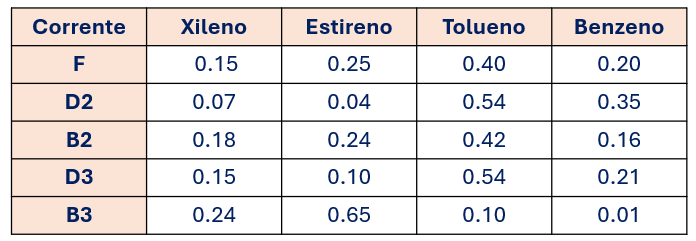

In [8]:
display(Image(filename='dados_vazoes_componentes.png', width=500))

Vamos colocar os dados da tabela acima na forma: $A.\vec{x}=\vec{b}$

LEMPRAR QUE OS VALORES DAS COLUNAS DA TABELA VIRA AS LINHAS NA MATRIZ.

\begin{equation}
\begin{bmatrix}
        0.07 & 0.18 & 0.15 & 0.24 \\
        0.04 & 0.24 & 0.10 & 0.65 \\
        0.54 & 0.42 & 0.54 & 0.10 \\
        0.35 & 0.16 & 0.21 & 0.01 \\
    \end{bmatrix}
       .
    \begin{bmatrix}
    D_2 \\
    B_2 \\
    D_3 \\
    B_3
    \end{bmatrix}
    = 
    \begin{bmatrix}
    F_{z1} \\
    F_{z2} \\
    F_{z3} \\
    F_{z4}
    \end{bmatrix}
\end{equation}

Dessa forma, a matriz A teremos:

\begin{equation}
A =
\begin{bmatrix}
    y_{21} & x_{21} & y_{31} & x_{31} \\
    y_{22} & x_{22} & y_{32} & x_{32} \\
    y_{23} & x_{23} & y_{33} & x_{33} \\
    y_{24} & x_{24} & y_{34} & x_{34} \\
\end{bmatrix}
    = 
    \begin{bmatrix}
    0.07 & 0.18 & 0.15 & 0.24 \\
    0.04 & 0.24 & 0.10 & 0.65 \\
    0.54 & 0.42 & 0.54 & 0.10 \\
    0.35 & 0.16 & 0.21 & 0.01 \\
    \end{bmatrix}
\end{equation}

#### CÁLCULOS

In [6]:
import numpy as np 
import numpy.linalg as nl

In [8]:
# DECLARANDO OS DADOS DE VAZÃO DE ENTRADA

F = 70 #mol/min - Vazão de entrada de alimentação da primeira coluna

F1 = 0.15*F # Vazão de entrada do Xileno
F2 = 0.25*F # Vazão de entrada do Extireno
F3 = 0.40*F # Vazão de entrada do Tolueno
F4 = 0.20*F # Vazão de entrada do Benzeno


In [9]:
Ftotal = F1 + F2 + F3 + F4
Ftotal

70.0

In [17]:
# DECLARANDO AS VARIAVEIS

y21, x21, y31, x31 = 0.07, 0.18, 0.15, 0.24
y22, x22, y32, x32 = 0.04, 0.24, 0.10, 0.65
y23, x23, y33, x33 = 0.54, 0.42, 0.54, 0.10
y24, x24, y34, x34 = 0.35, 0.16, 0.21, 0.01

A = np.array([
    [y21, x21, y31, x31],
    [y22, x22, y32, x32],
    [y23, x23, y33, x33],
    [y24, x24, y34, x34]
])


In [18]:
# DECLARANDO O VETOR B

b = ([
    [F1],
    [F2],
    [F3],
    [F4]
])

b

[[10.5], [17.5], [28.0], [14.0]]

In [19]:
# Vamos resolver A.x = b usando a função solve de algebra linear (linalg) do numpy.

x = np.linalg.solve(A, b) # calculando a inversa
x


array([[26.25],
       [17.5 ],
       [ 8.75],
       [17.5 ]])

In [20]:
# CALCULANDO OS FLUXOS DE SAIDA DAS COLUNAS

D2 = x[0,0]
B2 = x[1,0]
D3 = x[2,0]
B3 = x[3,0]

# obs : para extrair o valor de uma matriz, tem qye identificar a linha e coluna, seja x[i,j]


Como agora já teos os valores de D2, B2, D3 E B3, podemos encontrar os valores de D1 e B1 que sai da primeira coluna fazendo um volume de controle no __segundo separador__.

__BALANÇO NA COLUNA 2__

$$Massa \ \ total: \ \ D_1 = D_2 + B_2 $$

$$ Xileno: \ \ D_1y_{11} = D_2y_{21} + B_2x_{21} $$
$$ Estireno: \ \  D_1y_{12} = D_2y_{22} + B_2x_{22}$$
$$ Tolueno: \ \ D_1y_{13} = D_2y_{23} + B_2x_{23}$$
$$ Benzeno: \ \ D_1y_{14}  = D_2y_{24} + B_2x_{24}$$

In [24]:
# BALANÇO DE MASSA TOTAL NA  COLUNA 2.

D1 = D2 + B2

# BALANÇO DOS COMPONENTES NA CORRENTE 2.

D1y11 = D2*y21 + B2*x21 # balanço do xileno
D1y12 = D2*y22 + B2*x22 # balanço do estireno
D1y13 = D2*y23 + B2*x23 # balanço do tolueno
D1y14 = D2*y24 + B2*x24 # balanço do benzeno

5.250000000000044

In [29]:
# Composição da corrente D1. (Corrente de topo que sai do primeiro separador.)

# PRECISAMOS ACHAR Y11, Y12, Y13, Y14

y11 = (D1y11)/D1 # Composição do xileno
y12 = (D1y12)/D1 # Composição do estireno
y13 = (D1y13)/D1 # Composição do tolueno
y14 = (D1y14)/D1 # Composição do benzeno

0.11400000000000027

__BALANÇO NA COLUNA 3__

$$Massa \ \ total: \ \ B_1 = D_3 + B_3 $$

$$ Xileno: \ \ B_1x_{11} = D_3y_{31} + B_3x_{31} $$
$$ Estireno: \ \  B_1x_{12} = D_3y_{32} + B_3x_{32}$$
$$ Tolueno: \ \ B_1x_{13} = D_3y_{33} + B_3x_{33}$$
$$ Benzeno: \ \ B_1x_{14}  = D_3y_{34} + B_3x_{34}$$


In [34]:
# BALANÇO DE MASSA TOTAL NA  COLUNA 3.

B1 = D3 + B3

# BALANÇO DOS COMPONENTES NA CORRENTE 1.

B1x11 = D3*y31 + B3*x31 # balanço do xileno
B1x12 = D3*y32 + B3*x32 # balanço do estireno
B1x13 = D3*y33 + B3*x33 # balanço do tolueno
B1x14 = D3*y34 + B3*x34 # balanço do benzeno

In [35]:
# Composição da corrente B1. (Corrente de topo que sai do primeiro separador.)

# PRECISAMOS ACHAR x11, x12, x13, x14

x11 = (B1x11)/B1 # Composição do xileno
x12 = (B1x12)/B1 # Composição do estireno
x13 = (B1x13)/B1 # Composição do tolueno
x14 = (B1x14)/B1 # Composição do benzeno

In [36]:
# CONFERINDO OS RESULTADOS

z1 = y21*D2 + x21*B2 + y31*D3 + x31*B3
z2 = y22*D2 + x22*B2 + y32*D3 + x32*B3
z3 = y23*D2 + x23*B2 + y33*D3 + x33*B3
z4 = y24*D2 + x24*B2 + y34*D3 + x34*B3

#### __IMPRIMINDO OS RESULTADOS__

In [41]:
def line():
    print('-'*60)

In [43]:
line()
print (" DADOS INICIAIS ")
line()
line()
print("Vazão de entrada F =", F, "mol/min") 
line()
line()
print(" COLUNA 1 ")
line()
print (" Fluxo de saída no topo da coluna 1, D1 = {:.2f}. ".format(D1), "mol/min")
print(" Fluxo de saída no topo da coluna 1, B1 = {:.2f}. ".format(B1), "mol/min")
line()
line()
print(" COLUNA 2 ")
line()
print (" Fluxo de saída no topo da coluna 2, D2 = {:.2f}. ".format(D2), "mol/min")
print(" Fluxo de saída no topo da coluna 2, B2 = {:.2f}. ".format(B2), "mol/min")
line()
line()
print(" COLUNA 3 ")
line()
print (" Fluxo de saída no topo da coluna 3, D3 = {:.2f}. ".format(D3), "mol/min")
print(" Fluxo de saída no topo da coluna 3, B3 = {:.2f}. ".format(B3), "mol/min")
line()
line()
print("COMPOSIÇÃO DA CORRENTE D1")
line()
print("Composição do Xileno na saída do topo da coluna 1 é y11 = {:.2f}".format(y11))
print("Composição do Estireno na saída do topo da coluna 1 é y12 = {:.2f}".format(y12))
print("Composição do Tolueno na saída do topo da coluna 1 é y13 = {:.2f}".format(y13))
print("Composição do Benzeno na saída do topo da coluna 1 é y14 = {:.2f}".format(y14))
line()
line()
print("Composição do Xileno na saída de fundo da coluna 1 é x11 = {:.2f}".format(x11))
print("Composição do Estireno na saída de fundo da coluna 1 é x12 = {:.2f}".format(x12))
print("Composição do Tolueno na saída de fundo da coluna 1 é x13 = {:.2f}".format(x13))
print("Composição do Benzeno na saída de fundo da coluna 1 é x14 = {:.2f}".format(x14))

------------------------------------------------------------
 DADOS INICIAIS 
------------------------------------------------------------
------------------------------------------------------------
Vazão de entrada F = 70 mol/min
------------------------------------------------------------
------------------------------------------------------------
 COLUNA 1 
------------------------------------------------------------
 Fluxo de saída no topo da coluna 1, D1 = 43.75.  mol/min
 Fluxo de saída no topo da coluna 1, B1 = 26.25.  mol/min
------------------------------------------------------------
------------------------------------------------------------
 COLUNA 2 
------------------------------------------------------------
 Fluxo de saída no topo da coluna 2, D2 = 26.25.  mol/min
 Fluxo de saída no topo da coluna 2, B2 = 17.50.  mol/min
------------------------------------------------------------
------------------------------------------------------------
 COLUNA 3 
---------------

Vamos iprimir a comparação dos valores de b e o resultado de z.

In [47]:
line()
print("CONFERINDO OS RESULTADOS")
line()
print(f" O resultado de F1 = {F1}, e o resultado de z1 = {z1}")
print(f" O resultado de F2 = {F2}, e o resultado de z2 = {z2}")
print(f" O resultado de F3 = {F3}, e o resultado de z3 = {z3}")
print(f" O resultado de F4 = {F4}, e o resultado de z4 = {z4}")
line()

------------------------------------------------------------
CONFERINDO OS RESULTADOS
------------------------------------------------------------
 O resultado de F1 = 10.5, e o resultado de z1 = 10.5
 O resultado de F2 = 17.5, e o resultado de z2 = 17.5
 O resultado de F3 = 28.0, e o resultado de z3 = 28.0
 O resultado de F4 = 14.0, e o resultado de z4 = 14.0
------------------------------------------------------------
